# Libraries

In [6]:
import subprocess
from functions import *

In [7]:
_ = find_multipolygon_contours(r'C:\git-projetos\chloride_ingress_probabilistic_model\dataset_contours_aggregate_by_patch_filtered.json')

[MultiPolygon] 01_66.png
[MultiPolygon] 03_7.png
[MultiPolygon] 03_44.png
[MultiPolygon] 03_63.png
[MultiPolygon] 03_71.png
[MultiPolygon] 03_507.png
[MultiPolygon] 07_329.png
[MultiPolygon] 08_35.png
[MultiPolygon] 08_63.png
[MultiPolygon] 08_255.png
[MultiPolygon] 09_22.png
[MultiPolygon] 10_129.png
[MultiPolygon] 13_41.png
[MultiPolygon] 13_135.png
[MultiPolygon] 14_107.png
[MultiPolygon] 15_13.png
[MultiPolygon] 15_444.png
[MultiPolygon] 16_158.png
[MultiPolygon] 16_183.png
[MultiPolygon] 17_269.png


In [8]:
clean_dataset_to_mesh('malha_1.json')

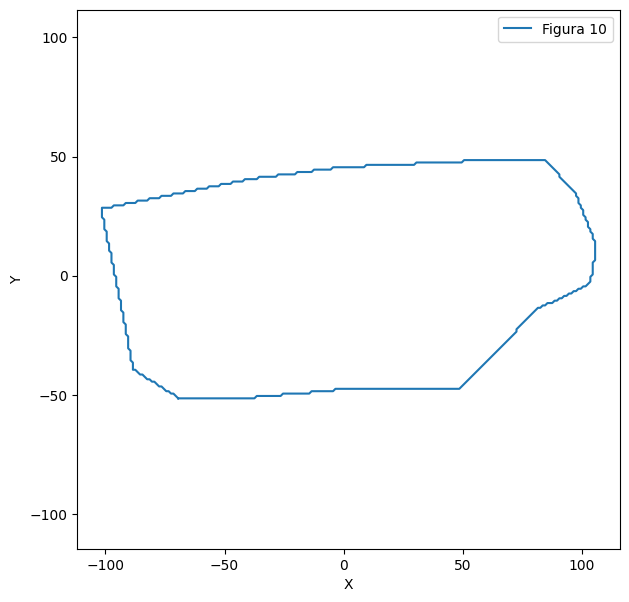

In [14]:
import json
import matplotlib.pyplot as plt

# Carregar o JSON
with open("malha_1_ketson.json", "r") as f:
    data = json.load(f)

plt.figure(figsize=(7, 7))

# Iterar sobre as figuras (chaves do JSON)
for key, fig in data.items():
    x = fig["x coordinate"]
    y = fig["y coordinate"]
    plt.plot(x, y, label=f"Figura {key}")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.axis("equal")
plt.show()

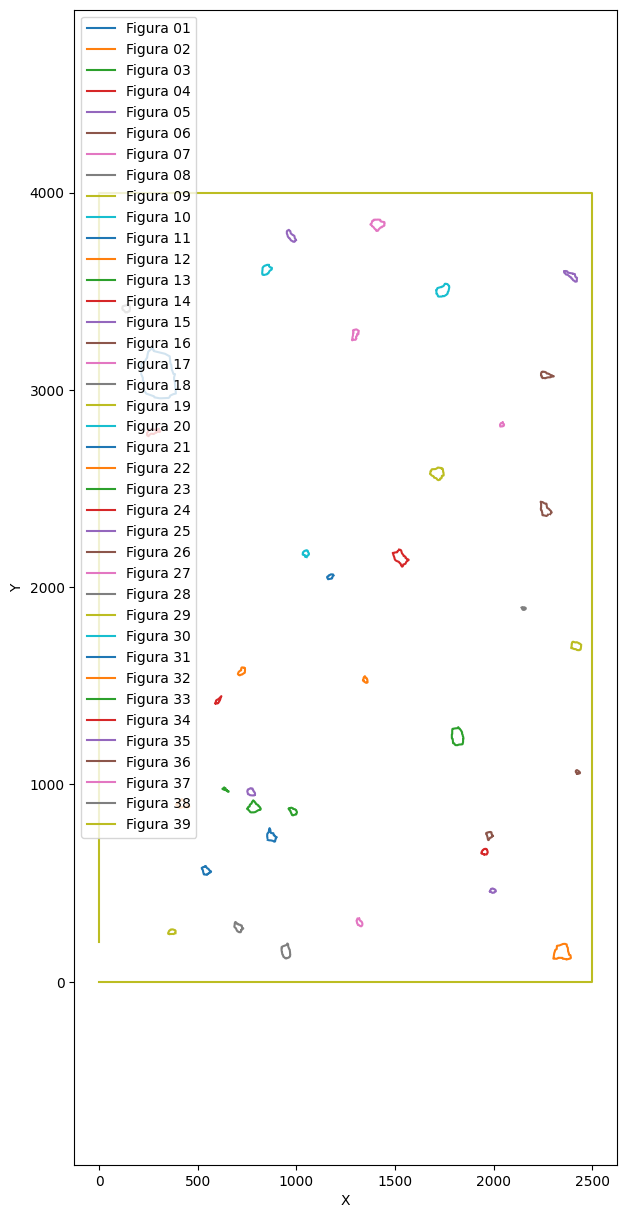

In [10]:
import json
import matplotlib.pyplot as plt

# Carregar o JSON
with open("dataset_cleaned.json", "r") as f:
    data = json.load(f)

plt.figure(figsize=(7, 15))

# Iterar sobre as figuras (chaves do JSON)
for key, fig in data.items():
    x = fig["x coordinate"]
    y = fig["y coordinate"]
    plt.plot(x, y, label=f"Figura {key}")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.axis("equal")
plt.show()


# Contour Mesh

In [21]:
mesh_gen('dataset_cleaned.json', mesh_size=5000, outfile="saida_saneada.geo")

## Save in `.msh`format

In [ ]:
shell_output = subprocess.run('"C:\\Users\\wande\\Downloads\\gmsh-4.14.0-Windows64 (2)\\gmsh-4.14.0-Windows64\\gmsh.exe" "C:\\git-projetos\\chloride_ingress_probabilistic_model\\saida_saneada.geo" -2', shell=True)
print(shell_output)

## Plot mesh

In [ ]:
import matplotlib.pyplot as plt
import meshio
import numpy as np

# Carrega a malha
mesh = meshio.read("saida_saneada.msh")
points = mesh.points
cells = mesh.cells_dict.get("triangle", None)
cell_data = mesh.cell_data_dict.get("gmsh:physical", {}).get("triangle", None)

if cells is not None and cell_data is not None:
    # Identifica grupos físicos e cria cores
    group_ids = np.unique(cell_data)
    n_groups = len(group_ids)

    # Compatível com todas as versões: plt.get_cmap
    color_map = plt.get_cmap("tab10")  # tab10 tem 10 cores
    colors = {group_id: color_map(i % 10) for i, group_id in enumerate(group_ids)}

    plt.figure(figsize=(6, 6))
    for i, triangle in enumerate(cells):
        tri_pts = points[triangle]
        x = list(tri_pts[:, 0]) + [tri_pts[0, 0]]  # fecha o triângulo
        y = list(tri_pts[:, 1]) + [tri_pts[0, 1]]
        group_id = cell_data[i]
        plt.fill(x, y, color=colors[group_id], edgecolor='k', linewidth=0.5)

    plt.gca().set_aspect('equal')
    plt.title("Mesh by physical group")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.show()
else:
    print("Mesh or physical groups not found.")
